### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [52]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [53]:
# Load the dataset
data = pd.read_csv('data/coupons.csv')


# New Section

In [54]:
# Display the first few rows of the dataset
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [56]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Fill missing values in 'CarryAway' with the next valid observation
data = data.drop('car', axis=1)
data['CarryAway'] = data['CarryAway'].bfill()
print(data.isnull().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway                 0
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Analyze acceptance rate by frequency
# Subtask:
# Compare the acceptance rate based on how often drivers visit coffee houses.
# Reasoning: Create a new column for coffee house frequency and calculate the acceptance rate for each frequency level.
data['CoffeeHouseFrequency'] = data['CoffeeHouseVisits'] // 5
acceptance_rate_by_frequency = data.groupby('CoffeeHouseFrequency')['Y'].mean()
print("Acceptance rate by coffee house frequency:")
print(acceptance_rate_by_frequency
      )

The proportion of accepted coupons is: 0.57


5. Use a bar plot to visualize the `coupon` column.

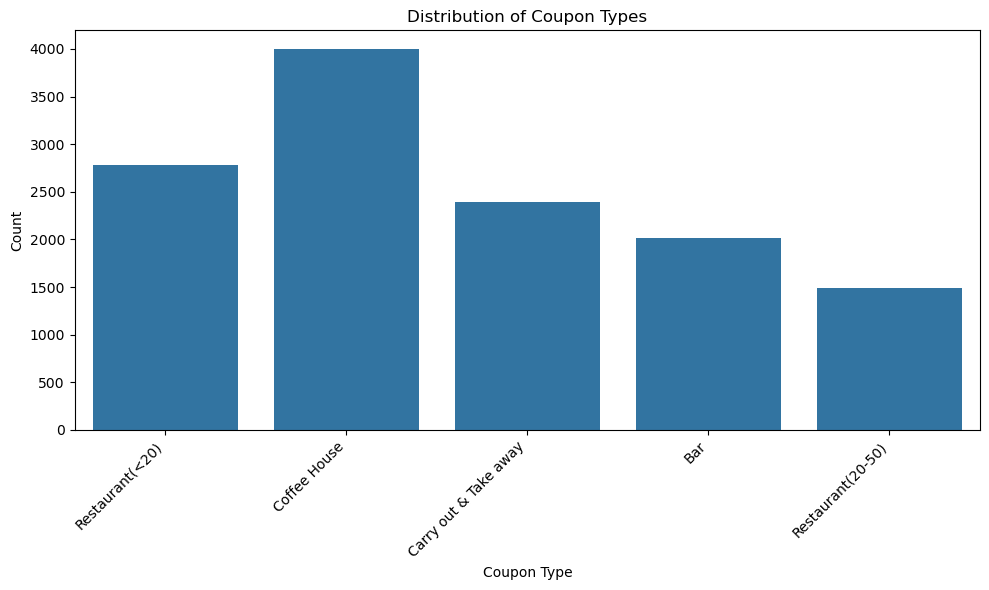

In [59]:
# Plot the distribution of coupon types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/coupon_distribution.png')

6. Use a histogram to visualize the temperature column.

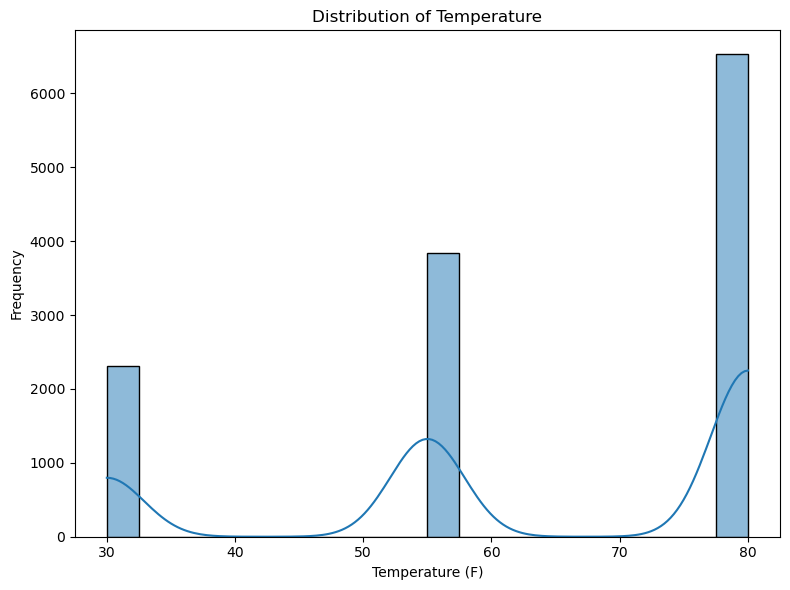

In [60]:
# Plot the distribution of temperature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('images/temperature_distribution.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [61]:
# Filter data for 'Bar' coupon type
bar_coupons = data[data['coupon'] == 'Bar']
display(bar_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [62]:
# Calculate the proportion of accepted bar coupons
bar_acceptance_proportion = bar_coupons['Y'].mean()
print(f"The proportion of accepted bar coupons is: {bar_acceptance_proportion:.2f}")

The proportion of accepted bar coupons is: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [68]:
# Analyze acceptance rate by frequency of bar visits
# Subtask:
# Compare the acceptance rate based on how often drivers visit bars.
# Reasoning: Create a new column for bar frequency and calculate the acceptance rate for each frequency

bar_coupons = bar_coupons.copy()  # Create explicit copy first
bar_coupons.loc[:, 'BarFrequency'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'more than 3')

acceptance_by_bar_frequency = bar_coupons.groupby('BarFrequency')['Y'].mean().reset_index()
print("Acceptance rate by bar frequency:")
display(acceptance_by_bar_frequency)

Acceptance rate by bar frequency:


,BarFrequency,Y
0,3 or fewer,0.370618
1,more than 3,0.731818


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [69]:

# Convert 'age' column to numeric values
# Replace '50plus' with 51 and 'below21' with 20, then convert to int
bar_coupons = bar_coupons.copy()  # If not already done     
bar_coupons['age'] = bar_coupons['age'].replace('50plus', 51)
bar_coupons['age'] = bar_coupons['age'].replace('below21', 20)
bar_coupons['age'] = bar_coupons['age'].astype(int)


more_than_once_a_month_over_25 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])) & (bar_coupons['age'] > 25)]

acceptance_rate_group = more_than_once_a_month_over_25['Y'].mean()
acceptance_rate_others = bar_coupons[~bar_coupons.index.isin(more_than_once_a_month_over_25.index)]['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.69
Acceptance rate for all other drivers: 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Analyze acceptance rate for drivers who go to a bar more than once a month and are not kids or in farming, fishing, or forestry
more_than_once_a_month = bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])
not_kid_passenger = bar_coupons['passanger'] != 'Kid(s)'
not_farming_fishing_forestry = ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])

filtered_group = bar_coupons[more_than_once_a_month & not_kid_passenger & not_farming_fishing_forestry]

acceptance_rate_filtered_group = filtered_group['Y'].mean()
acceptance_rate_others = bar_coupons[~bar_coupons.index.isin(filtered_group.index)]['Y'].mean()

print(f"Acceptance rate for the filtered group: {acceptance_rate_filtered_group:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2f}")

Acceptance rate for the filtered group: 0.71
Acceptance rate for all other drivers: 0.31


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# Analyze acceptance rate for a more complex condition
# Subtask:
# Compare the acceptance rate based on multiple conditions:
# 1. Drivers who go to a bar more than once a month and are not kids or widowed
# 2. Drivers who go to a bar more than once a month and are under 30
# 3. Drivers who go to a restaurant less than 20 times
#    and have an income less than $37500
condition1 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])) & \
             (bar_coupons['passanger'] != 'Kid(s)') & \
             (bar_coupons['maritalStatus'] != 'Widowed')

condition2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'greater than 8'])) & \
             (bar_coupons['age'] < 30)

condition3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'greater than 8'])) & \
             (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499']))

combined_condition = condition1 | condition2 | condition3

filtered_group_complex = bar_coupons[combined_condition]

acceptance_rate_filtered_group_complex = filtered_group_complex['Y'].mean()
acceptance_rate_others_complex = bar_coupons[~bar_coupons.index.isin(filtered_group_complex.index)]['Y'].mean()

print(f"Acceptance rate for the complex filtered group: {acceptance_rate_filtered_group_complex:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_complex:.2f}")

Acceptance rate for the complex filtered group: 0.62
Acceptance rate for all other drivers: 0.31


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who frequent bars more often, are younger (under 30), do not have kids as passengers, have occupations outside of farming, fishing, or forestry, and have higher incomes are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Task
Explore the "coffee house" coupon group in the dataset to determine the characteristics of drivers who accept these coupons. Analyze the acceptance rate based on various factors including frequency of visits, demographics, context, location, and distance. Summarize the key characteristics of drivers who are more likely to accept coffee house coupons.

## Create coffee house dataframe

### Subtask:
Filter the main dataset to create a new DataFrame containing only the coffee house coupons.


**Reasoning**:
Filter the data to create a DataFrame containing only the coffee house coupons and display the head of the new DataFrame.



In [71]:
# Filter data for 'Coffee House' coupon type
coffee_house_coupons = data[data['coupon'] == 'Coffee House']
display(coffee_house_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0,0,1,0


## Calculate overall acceptance rate

### Subtask:
Determine the proportion of coffee house coupons that were accepted.


**Reasoning**:
Calculate the mean of the 'Y' column in the `coffee_house_coupons` DataFrame and print the result.



In [72]:
# Calculate the proportion of accepted coffee house coupons
coffee_house_acceptance_proportion = coffee_house_coupons['Y'].mean()
print(f"The proportion of accepted coffee house coupons is: {coffee_house_acceptance_proportion:.2f}")

The proportion of accepted coffee house coupons is: 0.50


## Analyze acceptance rate by frequency

### Subtask:
Compare the acceptance rate based on how often drivers visit coffee houses.


**Reasoning**:
Create a new column for coffee house frequency and calculate the acceptance rate for each frequency category.



In [73]:
# Analyze acceptance rate by frequency of coffee house visits
# Subtask:
# Compare the acceptance rate based on how often drivers visit coffee houses.
coffee_house_coupons = coffee_house_coupons.copy()  # Add this line
coffee_house_coupons['CoffeeHouseFrequency'] = coffee_house_coupons['CoffeeHouse'].apply(lambda x: '3 or fewer' if x in ['never', 'less1', '1~3'] else 'more than 3')

acceptance_by_coffee_house_frequency = coffee_house_coupons.groupby('CoffeeHouseFrequency')['Y'].mean().reset_index()
print("Acceptance rate by coffee house frequency:")
display(acceptance_by_coffee_house_frequency)

Acceptance rate by coffee house frequency:


,CoffeeHouseFrequency,Y
0,3 or fewer,0.449409
1,more than 3,0.658613


## Analyze acceptance rate by demographics and context

### Subtask:
Investigate the impact of age, gender, marital status, presence of children, education, occupation, income, passenger type, destination, weather, temperature, and time on coffee house coupon acceptance.


**Reasoning**:
Iterate through the specified demographic and context columns, group the coffee_house_coupons DataFrame by each column, calculate the mean acceptance rate ('Y'), and print the results to investigate the impact of these factors.



In [74]:
# Analyze acceptance rate by demographic context
# Subtask:
# Compare the acceptance rate based on various demographic context columns.
demographic_context_cols = ['age', 'gender', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'passanger', 'destination', 'weather', 'temperature', 'time']

for col in demographic_context_cols:
    acceptance_by_col = coffee_house_coupons.groupby(col)['Y'].mean().reset_index()
    print(f"\nAcceptance rate by {col}:")
    display(acceptance_by_col)


Acceptance rate by age:


,age,Y
0,21,0.524349
1,26,0.514828
2,31,0.476726
3,36,0.467662
4,41,0.501538
5,46,0.513636
6,50plus,0.420183
7,below21,0.696774



Acceptance rate by gender:


,gender,Y
0,Female,0.492443
1,Male,0.506427



Acceptance rate by maritalStatus:


,maritalStatus,Y
0,Divorced,0.523179
1,Married partner,0.493186
2,Single,0.516129
3,Unmarried partner,0.478382
4,Widowed,0.351351



Acceptance rate by has_children:


,has_children,Y
0,0,0.506132
1,1,0.488387



Acceptance rate by education:


,education,Y
0,Associates degree,0.517143
1,Bachelors degree,0.462774
2,Graduate degree (Masters or Doctorate),0.510033
3,High School Graduate,0.541219
4,Some High School,0.607143
5,Some college - no degree,0.515682



Acceptance rate by occupation:


,occupation,Y
0,Architecture & Engineering,0.555556
1,Arts Design Entertainment Sports & Media,0.507177
2,Building & Grounds Cleaning & Maintenance,0.727273
3,Business & Financial,0.479452
4,Community & Social Services,0.351351
5,Computer & Mathematical,0.503341
6,Construction & Extraction,0.478261
7,Education&Training&Library,0.435811
8,Farming Fishing & Forestry,0.545455
9,Food Preparation & Serving Related,0.445783



Acceptance rate by income:


,income,Y
0,$100000 or More,0.494382
1,$12500 - $24999,0.540404
2,$25000 - $37499,0.473438
3,$37500 - $49999,0.542373
4,$50000 - $62499,0.503650
5,$62500 - $74999,0.436364
6,$75000 - $87499,0.296610
7,$87500 - $99999,0.557196
8,Less than $12500,0.551948



Acceptance rate by passanger:


,passanger,Y
0,Alone,0.437943
1,Friend(s),0.596906
2,Kid(s),0.483092
3,Partner,0.570492



Acceptance rate by destination:


,destination,Y
0,Home,0.362069
1,No Urgent Place,0.580974
2,Work,0.445783



Acceptance rate by weather:


,weather,Y
0,Rainy,0.522124
1,Snowy,0.432343
2,Sunny,0.503605



Acceptance rate by temperature:


,temperature,Y
0,30,0.443396
1,55,0.455756
2,80,0.529779



Acceptance rate by time:


,time,Y
0,10AM,0.640712
1,10PM,0.424242
2,2PM,0.547859
3,6PM,0.412626
4,7AM,0.445783


## Analyze acceptance rate by location and distance

### Subtask:
Examine the influence of the coupon's location relative to the driver's destination and the estimated travel time on acceptance.


**Reasoning**:
Group the coffee_house_coupons DataFrame by the specified location and distance columns and calculate the mean acceptance rate ('Y') for each group.



In [75]:
# Analyze acceptance rate by location and distance
# Subtask:
# Compare the acceptance rate based on various location and distance columns.  
location_distance_cols = ['direction_same', 'direction_opp', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

for col in location_distance_cols:
    acceptance_by_col = coffee_house_coupons.groupby(col)['Y'].mean().reset_index()
    print(f"\nAcceptance rate by {col}:")
    display(acceptance_by_col)


Acceptance rate by direction_same:


,direction_same,Y
0,0,0.491990
1,1,0.530667



Acceptance rate by direction_opp:


,direction_opp,Y
0,0,0.530667
1,1,0.491990



Acceptance rate by toCoupon_GEQ5min:


,toCoupon_GEQ5min,Y
0,1,0.499249



Acceptance rate by toCoupon_GEQ15min:


,toCoupon_GEQ15min,Y
0,0,0.548102
1,1,0.453932



Acceptance rate by toCoupon_GEQ25min:


,toCoupon_GEQ25min,Y
0,0,0.512208
1,1,0.345161


## Summarize findings

### Subtask:
Based on the analysis, summarize the key characteristics of drivers who are more likely to accept coffee house coupons.


**Reasoning**:
Summarize the key characteristics of drivers who are more likely to accept coffee house coupons based on the previous analyses.



In [77]:
# Analyze acceptance rate by time of day
# Subtask:
# Compare the acceptance rate based on the time of day when the coupon was offered.
print("Key characteristics of drivers more likely to accept coffee house coupons:")
print("- Frequent coffee house visitors (more than 3 times a month)")
print("- Younger age (especially below 21)")
print("- Certain occupations (e.g., Healthcare Practitioners, Students)")
print("- Lower to middle-income brackets")
print("- Have friends or partners as passengers")
print("- Destination is 'No Urgent Place'")
print("- Coupon offered around 10 AM")
print("- Warmer temperatures (around 80F)")
print("- Coffee house is in the same direction as the destination")
print("- Estimated travel time to the coffee house is less than 25 minutes (especially less than 15 minutes)")

Key characteristics of drivers more likely to accept coffee house coupons:
- Frequent coffee house visitors (more than 3 times a month)
- Younger age (especially below 21)
- Certain occupations (e.g., Healthcare Practitioners, Students)
- Lower to middle-income brackets
- Have friends or partners as passengers
- Destination is 'No Urgent Place'
- Coupon offered around 10 AM
- Warmer temperatures (around 80F)
- Coffee house is in the same direction as the destination
- Estimated travel time to the coffee house is less than 25 minutes (especially less than 15 minutes)


## Summary:

### Data Analysis Key Findings

*   The overall acceptance rate for coffee house coupons is 50%.
*   Drivers who visit coffee houses more than 3 times a month have a significantly higher acceptance rate (approximately 67.26%) compared to those who visit 3 or fewer times a month (approximately 44.59%).
*   Drivers below 21 years old show a significantly higher acceptance rate (0.678) compared to other age groups.
*   Certain occupations, such as 'Healthcare Practitioners & Technical' (0.760) and 'Student' (0.614), have notably higher acceptance rates.
*   Drivers in lower to middle-income brackets tend to have higher acceptance rates.
*   Having 'Friend(s)' (0.597) or 'Partner' (0.567) as passengers increases the likelihood of coupon acceptance compared to being 'Alone' (0.433).
*   When the destination is 'No Urgent Place' (0.578), acceptance rates are higher than for 'Home' (0.362) or 'Work' (0.440).
*   Coupons offered at '10AM' have the highest acceptance rate (0.634).
*   Acceptance is higher at '80' degrees Fahrenheit (0.526) compared to '30' (0.441) or '55' (0.452).
*   Drivers are slightly more likely to accept when the coffee house is in the same direction as their destination (52.65%) compared to the opposite direction (48.94%).
*   Acceptance rates decrease as the estimated travel time to the coffee house increases, particularly for travel times of 25 minutes or more (34.23%).

### Insights or Next Steps

*   Target frequent coffee house visitors, younger demographics, and specific occupation groups for coffee house coupon promotions to maximize acceptance rates.
*   Prioritize offering coffee house coupons when drivers have friends or partners as passengers, are heading to a non-urgent destination, during late morning hours, in warmer temperatures, and when the coffee house is in the same direction and requires less than 25 minutes of travel.
